# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("50_Startups.csv")
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.nunique()   # Return number of unique elements in the object.

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [7]:
X = df.iloc[: , : -1].values
Y = df.iloc[:, -1].values
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [8]:
Y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [11]:
reg.coef_   

array([-5.23005912e+01,  1.46488202e+02, -9.41876104e+01,  8.06023114e-01,
       -2.70043196e-02,  2.69798610e-02])

In [12]:
reg.intercept_ # y intercept where actual graph cuts predicted graph

50177.64442290697

In [13]:
reg.score(X,Y)  # model accuracy score

0.9507524843355148

In [14]:
result = reg.predict(X)

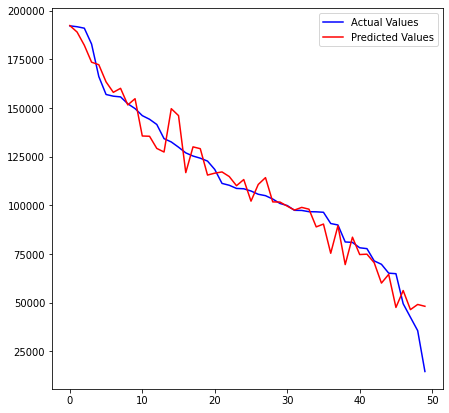

In [15]:
plt.figure(figsize = (7,7))
plt.plot(Y,color = 'blue', label = 'Actual Values')
plt.plot(result, color = 'red', label = 'Predicted Values')
plt.legend()

In [16]:
test_df = pd.DataFrame()
test_df['Actual Values'] = Y
test_df['Predicted_values'] = result
test_df

,Actual Values,Predicted_values
0,192261.83,192390.571363
1,191792.06,189071.320105
2,191050.39,182276.186733
3,182901.99,173584.976190
4,166187.94,172277.133817
5,156991.12,163473.807118
6,156122.51,158099.292784
7,155752.60,160155.644649
8,152211.77,151634.743326
9,149759.96,154829.662527


# Polynomial Regression

In [17]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


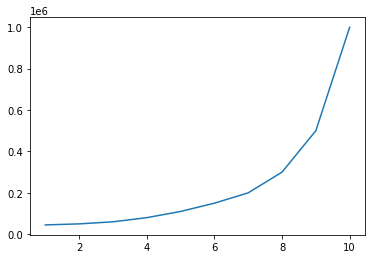

In [18]:
plt.figure()
plt.plot(df['Level'],df['Salary'])

In [19]:
X = df[['Level']].values
Y = df[['Salary']].values

In [20]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [21]:
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [23]:
y_pred = reg.predict(X)

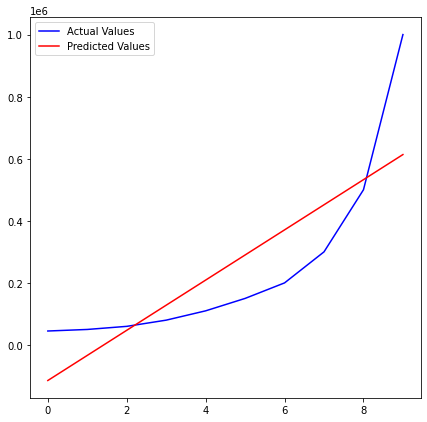

In [24]:
plt.figure(figsize = (7, 7))
plt.plot(Y, color = 'blue', label = 'Actual Values')
plt.plot(y_pred, color = 'red', label = 'Predicted Values')
plt.legend()

In [25]:
reg.score(X,Y)

0.6690412331929895

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [27]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly,Y)

LinearRegression()

In [28]:
y_pred2 = poly_reg.predict(X_poly)

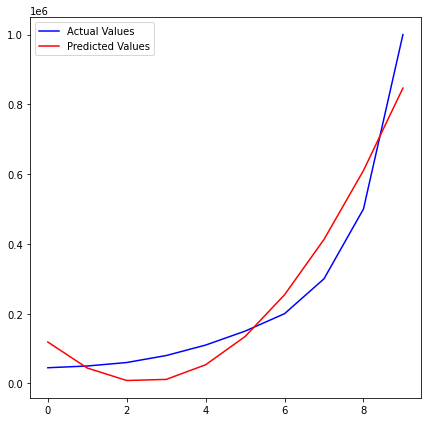

In [29]:
plt.figure(figsize = (7, 7))
plt.plot(Y, color = 'blue', label = 'Actual Values')
plt.plot(y_pred2, color = 'red', label = 'Predicted Values')
plt.legend()

In [30]:
poly_reg.score(X_poly, Y)

0.9162082221443942

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [32]:
poly_reg2 = LinearRegression()
poly_reg2.fit(X_poly,Y)

LinearRegression()

In [33]:
y_pred3 = poly_reg2.predict(X_poly)

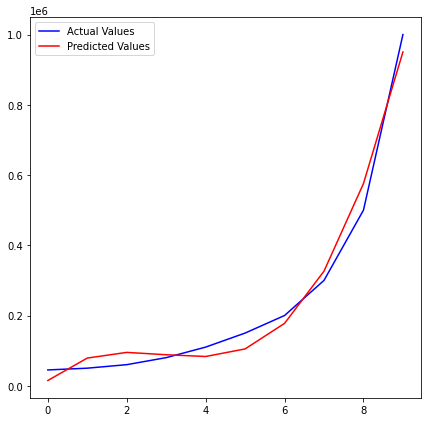

In [34]:
plt.figure(figsize = (7, 7))
plt.plot(Y, color = 'blue', label = 'Actual Values')
plt.plot(y_pred3, color = 'red', label = 'Predicted Values')
plt.legend()

In [35]:
poly_reg2.score(X_poly, Y)

0.9812097727913368

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(X)
X_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [37]:
poly_reg3 = LinearRegression()
poly_reg3.fit(X_poly,Y)

LinearRegression()

In [38]:
y_pred4 = poly_reg3.predict(X_poly)

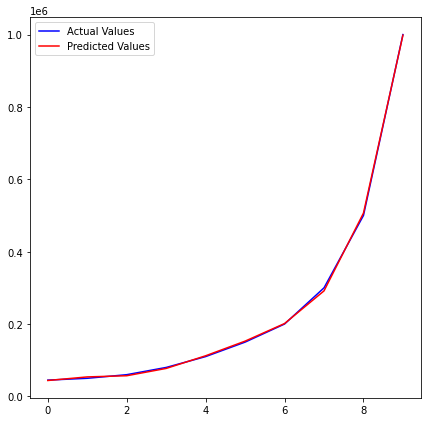

In [39]:
plt.figure(figsize = (7, 7))
plt.plot(Y, color = 'blue', label = 'Actual Values')
plt.plot(y_pred4, color = 'red', label = 'Predicted Values')
plt.legend()

In [40]:
poly_reg3.score(X_poly, Y)

0.9997969027099753

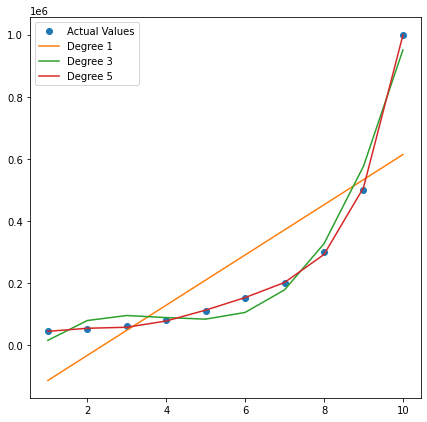

In [41]:
plt.figure(figsize = (7, 7))
plt.plot(X,Y,'o', label = 'Actual Values')
plt.plot(X,y_pred, label = 'Degree 1')
plt.plot(X,y_pred3, label = 'Degree 3')
plt.plot(X,y_pred4, label = 'Degree 5')
plt.legend()

From above graph we conclude degree 3 values are best fit
Degree 1 = Underfit
Degree 3 = Moderatefit
Degree 5 = Overfit